The plan for this section is relatively simple

1. we take the standard transformation for frame without FE and with consideration of FE
2. we takie Quantile transformation for frame without FE and with consideration of FE

We will try to get best possible explainable models from this

In [1]:
import pandas as pd

In [2]:
without_fe= pd.read_csv('pre_feature_engineering_data.csv', index_col=None)
with_fe= pd.read_csv('post_feature_engineering_data.csv', index_col=None)

# Modelling section

In [3]:
import pandas as pd
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# Importing all neded imports

import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode
import plotly.express as px
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import mode, entropy
from scipy.signal import butter, filtfilt
from scipy.fft import fft
from scipy.stats import skew, kurtosis
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn_extra.cluster import KMedoids

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Let's begin with the section that considers our FE

Starting from Quantile transformer:

In [4]:
transformer = QuantileTransformer(output_distribution='normal')

df_transformed = pd.DataFrame(transformer.fit_transform(with_fe), columns=with_fe.columns)

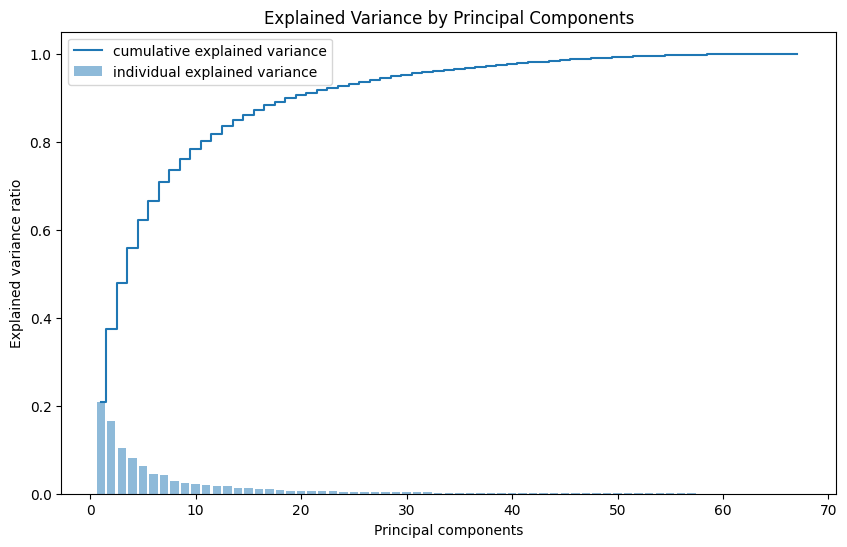

In [5]:
# Załóżmy, że df_transformed to Twój oryginalny DataFrame z danymi
# Przeprowadzenie PCA
pca = PCA(n_components=len(df_transformed.columns))  # Ustawienie n_components na liczbę cech
pca.fit(df_transformed)

# Obliczanie wyjaśnionej wariancji
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance.cumsum()

# Tworzenie wykresu wyjaśnialności wariancji
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.show()

Let's try high variance at the beginning

In [6]:
# Wybór liczby składowych PCA wyjaśniających 90% wariancji
threshold = 0.90
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Liczba składowych PCA wyjaśniających {threshold*100}% wariancji: {num_components}')

Liczba składowych PCA wyjaśniających 90.0% wariancji: 20


In [7]:
# Przeprowadzenie PCA z wybraną liczbą składowych
pca = PCA(n_components=num_components)
pca_components = pca.fit_transform(df_transformed)

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

# Przeprowadzenie klasteryzacji KMeans z różnymi liczbami klastrów
def test_kmeans(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

def test_kmedoids(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
        labels = kmedoids.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

# Przeprowadzenie klasteryzacji Agglomerative Clustering z różnymi liczbami klastrów
def test_agglomerative(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        agglo = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agglo.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

# Przeprowadzenie klasteryzacji DBSCAN z różnymi parametrami eps
def test_dbscan(X, eps_values=[0.5, 1.0, 1.5, 2.0]):
    results = []
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X)
        if len(set(labels)) > 1:  # Sprawdzamy, czy klasteryzacja zwróciła więcej niż jeden klaster
            scores = evaluate_clustering(X, labels)
            results.append((eps, scores))
    return results

# Przeprowadzenie klasteryzacji Agglomerative Clustering z różnymi liczbami klastrów
def test_agglomerative(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        agglo = AgglomerativeClustering(n_clusters=n_clusters)
        labels = agglo.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

# Przeprowadzenie klasteryzacji GaussianMixture z różnymi liczbami klastrów
def test_gaussian_mixture(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = gmm.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

# Funkcja do oceny klasteryzacji
def evaluate_clustering(X, labels):
    return {
        'Silhouette Score': silhouette_score(X, labels),
        'Davies-Bouldin Index': davies_bouldin_score(X, labels),
        'Calinski-Harabasz Index': calinski_harabasz_score(X, labels)
    }

# Przeprowadzenie klasteryzacji SpectralClustering z różnymi liczbami klastrów
def test_spectral_clustering(X, max_clusters=10):
    results = []
    for n_clusters in range(2, max_clusters + 1):
        spectral = SpectralClustering(n_clusters=n_clusters, random_state=42, assign_labels='discretize')
        labels = spectral.fit_predict(X)
        scores = evaluate_clustering(X, labels)
        results.append((n_clusters, scores))
    return results

# Testowanie różnych algorytmów klasteryzacji na pca_components
kmeans_results = test_kmeans(pca_components)
kmedoids_results = test_kmedoids(pca_components)
agglo_results = test_agglomerative(pca_components)
dbscan_results = test_dbscan(pca_components)
agglomerative_results= test_agglomerative(pca_components)
gaussian_results= test_gaussian_mixture(pca_components)

# Tworzenie DataFrame z wynikami
kmeans_df = pd.DataFrame(kmeans_results, columns=['n_clusters', 'scores'])
kmedoids_df= pd.DataFrame(kmedoids_results, columns=['n_clusters', 'scores'])
agglo_df = pd.DataFrame(agglo_results, columns=['n_clusters', 'scores'])
agglomerative_df= pd.DataFrame(agglomerative_results, columns=['n_clusters', 'scores'])
gaussian_df= pd.DataFrame(gaussian_results, columns=['n_clusters', 'scores'])

dbscan_df = pd.DataFrame(dbscan_results, columns=['eps', 'scores'])


# Rozpakowanie kolumn scores
def unpack_scores(df):
    df['Silhouette Score'] = df['scores'].apply(lambda x: x['Silhouette Score'])
    df['Davies-Bouldin Index'] = df['scores'].apply(lambda x: x['Davies-Bouldin Index'])
    df['Calinski-Harabasz Index'] = df['scores'].apply(lambda x: x['Calinski-Harabasz Index'])
    return df.drop(columns=['scores'])

kmeans_df = unpack_scores(kmeans_df)
kmetodois_df = unpack_scores(kmedoids_df)
agglo_df = unpack_scores(agglo_df)
dbscan_df = unpack_scores(dbscan_df)
agglomerative_df= unpack_scores(agglomerative_df)
gaussian_df= unpack_scores(gaussian_df)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` exp

KeyboardInterrupt: 

In [46]:
kmeans_df

,n_clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.225260,1.737044,1259.881719
1,3,0.292495,1.543408,1296.434929
2,4,0.348275,1.218544,1385.487845
3,5,0.296088,1.319054,1270.612752
4,6,0.274334,1.430018,1135.313441
5,7,0.295750,1.428728,1074.568944
6,8,0.273270,1.559325,1014.150599
7,9,0.255763,1.608951,958.007003
8,10,0.278535,1.598199,900.047143


In [35]:
kmetodois_df

,n_clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.138188,2.506197,685.387385
1,3,0.094393,3.804819,394.670991
2,4,0.208300,1.636452,950.778302
3,5,0.109430,3.536797,378.099691
4,6,0.053874,3.460625,333.162851
5,7,0.161421,3.470698,537.242291
6,8,0.150078,3.477515,466.644248
7,9,0.149587,3.188933,432.179072
8,10,0.140562,3.179764,388.284061


In [36]:
agglo_df

,n_clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.225260,1.737044,1259.881719
1,3,0.292495,1.543408,1296.434929
2,4,0.348275,1.218544,1385.487845
3,5,0.291020,1.289570,1250.884019
4,6,0.306420,1.335734,1150.301605
5,7,0.295142,1.430079,1072.591766
6,8,0.280959,1.462511,1002.883157
7,9,0.263272,1.530186,946.803585
8,10,0.253982,1.569939,897.738267


In [37]:
dbscan_df

,eps,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,1.5,-0.104864,1.168691,4.323637
1,2.0,-0.172977,1.232420,35.967159


In [38]:
agglomerative_df

,n_clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.225260,1.737044,1259.881719
1,3,0.292495,1.543408,1296.434929
2,4,0.348275,1.218544,1385.487845
3,5,0.291020,1.289570,1250.884019
4,6,0.306420,1.335734,1150.301605
5,7,0.295142,1.430079,1072.591766
6,8,0.280959,1.462511,1002.883157
7,9,0.263272,1.530186,946.803585
8,10,0.253982,1.569939,897.738267


In [45]:
gaussian_df

,n_clusters,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,2,0.199335,1.705867,860.348482
1,3,0.153127,1.701711,816.917182
2,4,0.348275,1.218544,1385.487845
3,5,0.295184,1.315633,1268.210313
4,6,0.273396,1.427167,1133.143048
5,7,0.282603,1.423347,1030.430338
6,8,0.277979,1.619993,938.599569
7,9,0.258249,1.648711,885.399897
8,10,0.240132,2.049693,794.035164


Conclusions: Best are KMeans, Agglomerative Clustering for 4 clusters, let's try working with them more

In [9]:
# Przeprowadzenie klasteryzacji KMeans dla 4 klastrów
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(pca_components)

# Przeprowadzenie klasteryzacji Agglomerative Clustering dla 4 klastrów
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(pca_components)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


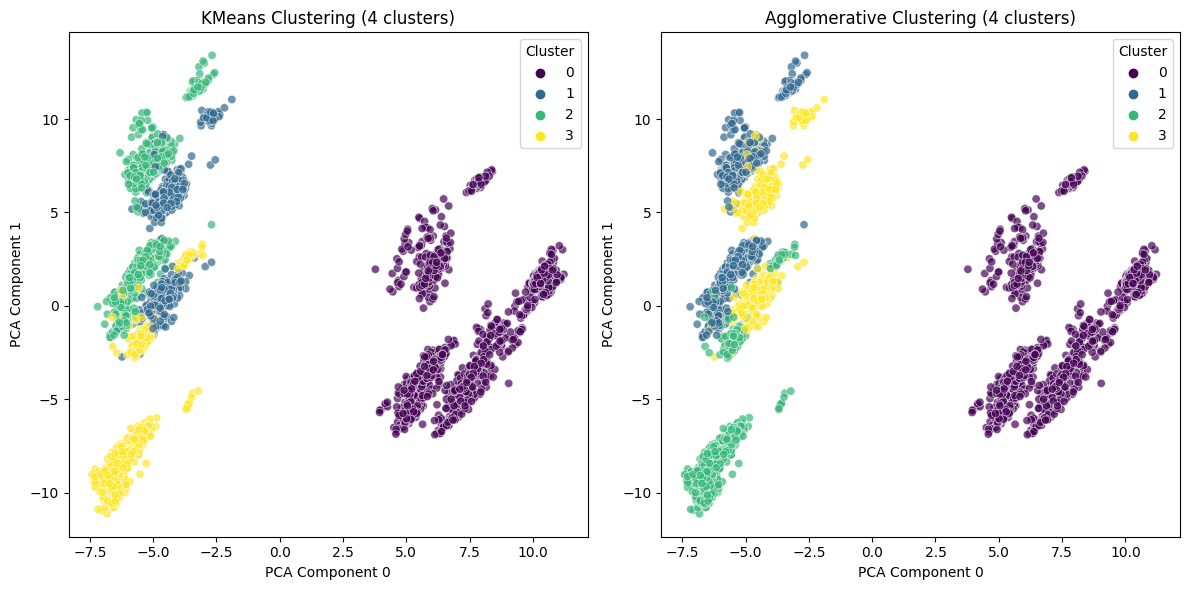

In [11]:
# Wizualizacja wyników klasteryzacji KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels_kmeans, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering (4 clusters)')
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.legend(title='Cluster', loc='upper right')

# Wizualizacja wyników klasteryzacji Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=labels_agglo, palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering (4 clusters)')
plt.xlabel('PCA Component 0')
plt.ylabel('PCA Component 1')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()

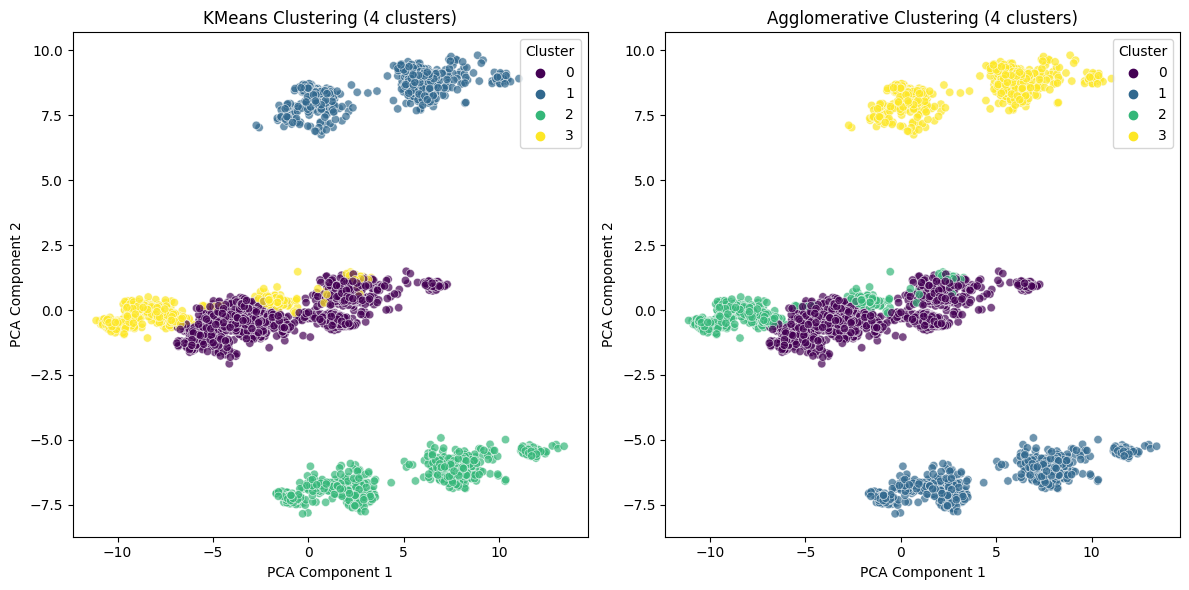

In [12]:
# Wizualizacja wyników klasteryzacji KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_components[:, 1], y=pca_components[:, 2], hue=labels_kmeans, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering (4 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')

# Wizualizacja wyników klasteryzacji Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_components[:, 1], y=pca_components[:, 2], hue=labels_agglo, palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering (4 clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()

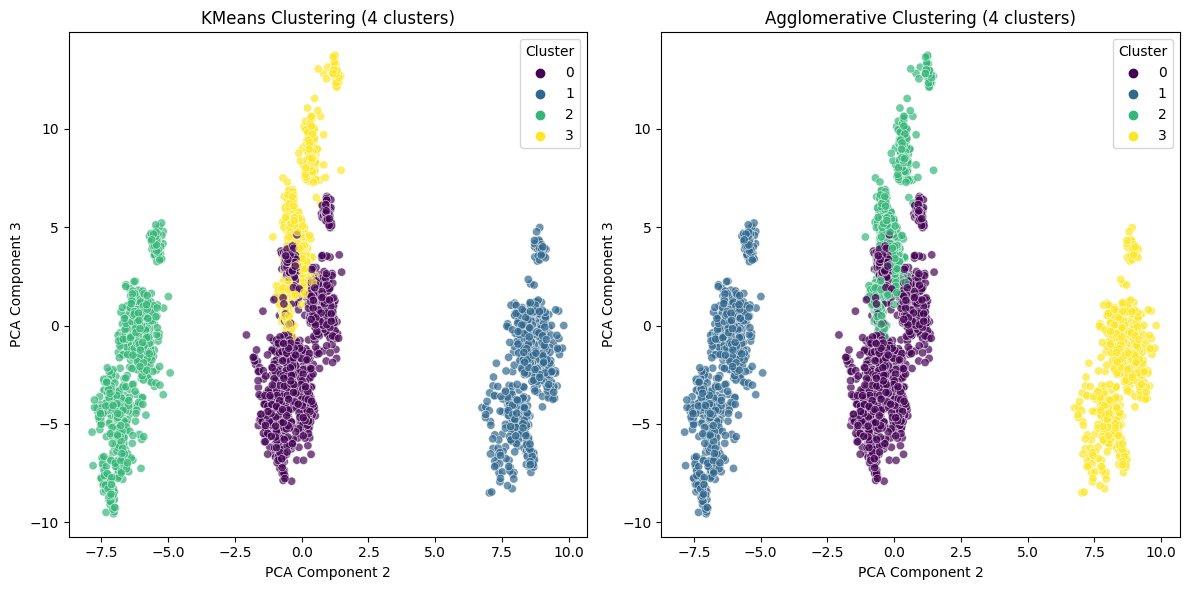

In [13]:
# Wizualizacja wyników klasteryzacji KMeans
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_components[:, 2], y=pca_components[:, 3], hue=labels_kmeans, palette='viridis', alpha=0.7)
plt.title('KMeans Clustering (4 clusters)')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.legend(title='Cluster', loc='upper right')

# Wizualizacja wyników klasteryzacji Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=pca_components[:, 2], y=pca_components[:, 3], hue=labels_agglo, palette='viridis', alpha=0.7)
plt.title('Agglomerative Clustering (4 clusters)')
plt.xlabel('PCA Component 2')
plt.ylabel('PCA Component 3')
plt.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()

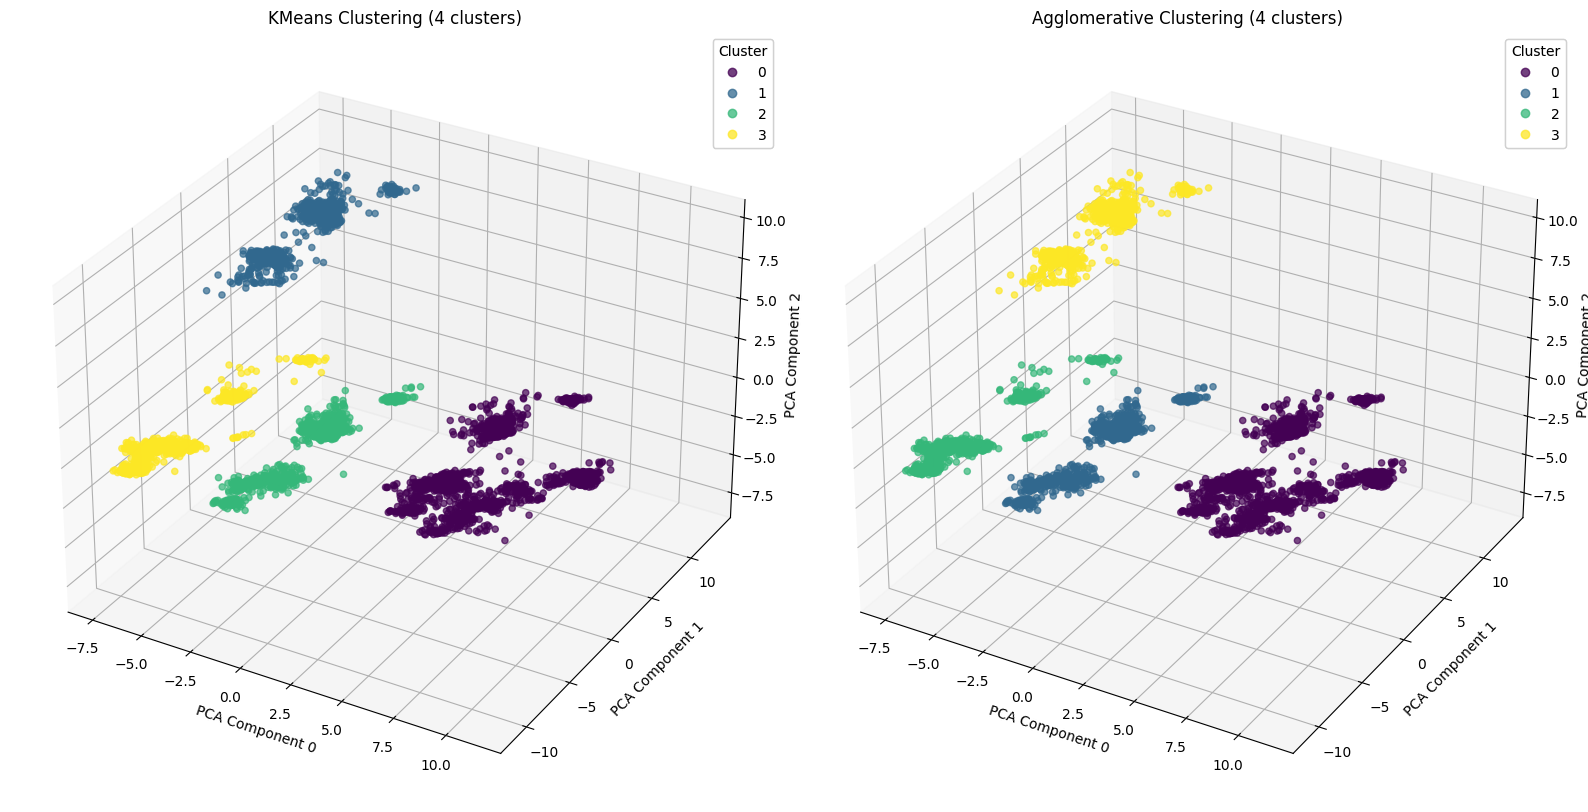

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Wizualizacja wyników klasteryzacji KMeans w 3D
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=labels_kmeans, cmap='viridis', alpha=0.7)
ax.set_title('KMeans Clustering (4 clusters)')
ax.set_xlabel('PCA Component 0')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
legend1 = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Wizualizacja wyników klasteryzacji Agglomerative Clustering w 3D
ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(pca_components[:, 0], pca_components[:, 1], pca_components[:, 2], c=labels_agglo, cmap='viridis', alpha=0.7)
ax.set_title('Agglomerative Clustering (4 clusters)')
ax.set_xlabel('PCA Component 0')
ax.set_ylabel('PCA Component 1')
ax.set_zlabel('PCA Component 2')
legend2 = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend2)

plt.tight_layout()
plt.show()

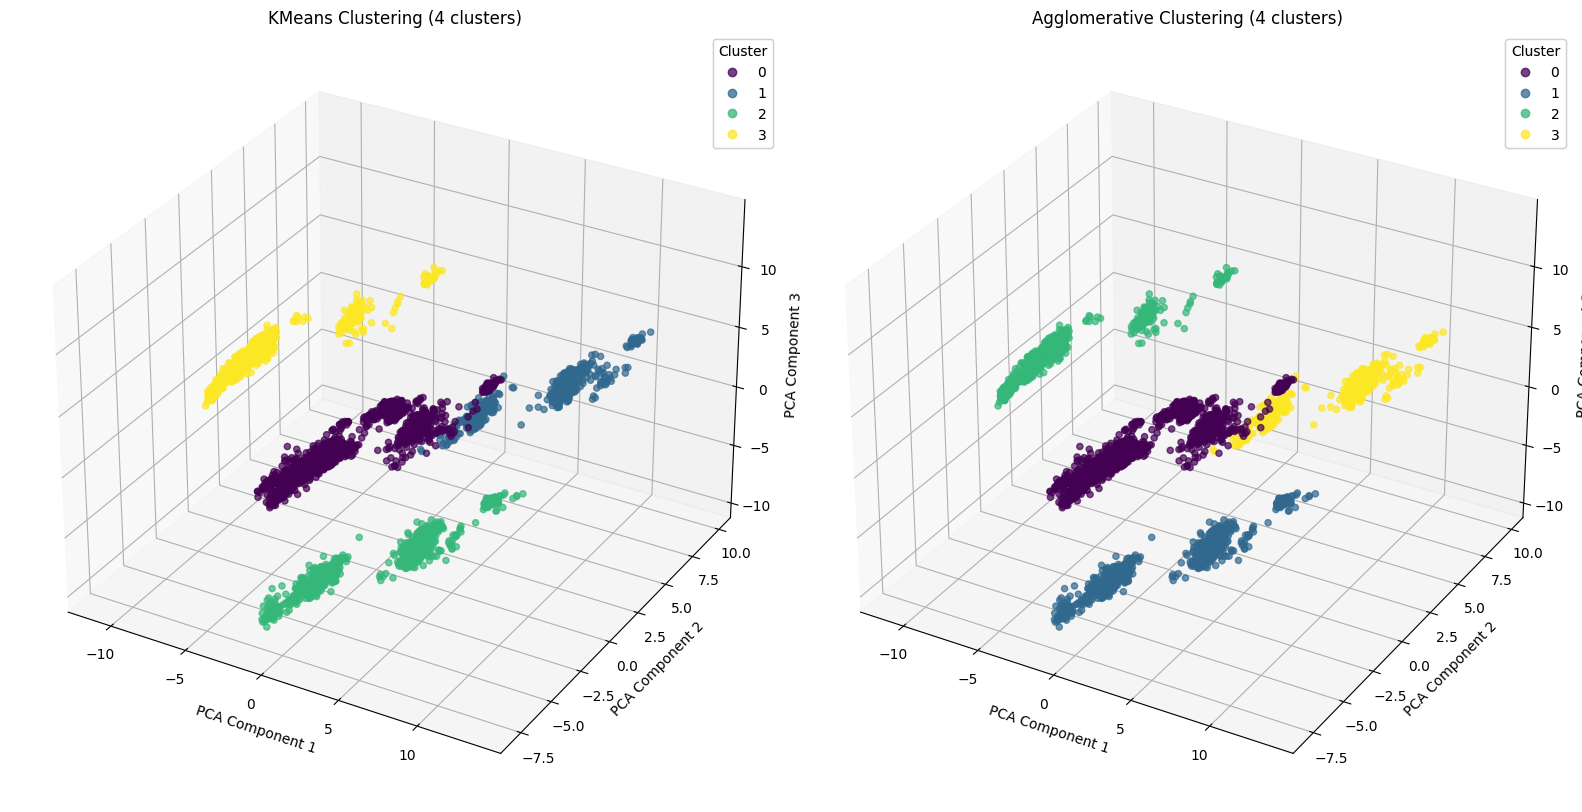

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Wizualizacja wyników klasteryzacji KMeans w 3D
fig = plt.figure(figsize=(16, 8))

ax = fig.add_subplot(121, projection='3d')
sc = ax.scatter(pca_components[:, 1], pca_components[:, 2], pca_components[:, 3], c=labels_kmeans, cmap='viridis', alpha=0.7)
ax.set_title('KMeans Clustering (4 clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
legend1 = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Wizualizacja wyników klasteryzacji Agglomerative Clustering w 3D
ax = fig.add_subplot(122, projection='3d')
sc = ax.scatter(pca_components[:, 1], pca_components[:, 2], pca_components[:, 3], c=labels_agglo, cmap='viridis', alpha=0.7)
ax.set_title('Agglomerative Clustering (4 clusters)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
legend2 = ax.legend(*sc.legend_elements(), title="Cluster")
ax.add_artist(legend2)

plt.tight_layout()
plt.show()

In [143]:
import pandas as pd

# Zakładając, że df_transformed ma 67 kolumn przed PCA
original_columns = df_transformed.columns[:67]

# Obliczenie współczynników PCA (loadings)
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(num_components)], index=original_columns)

In [144]:
# Wyświetlenie najważniejszych cech dla każdej składowej PCA
for i in range(num_components):
    print(f'\nNajważniejsze cechy dla PC{i+1}:')
    print(pca_loadings.iloc[:, i].nlargest(5))  # Największe wartości
    print(pca_loadings.iloc[:, i].nsmallest(5))  # Najmniejsze wartości


Najważniejsze cechy dla PC1:
bearing_north             0.770809
location_speedAccuracy    0.123541
Orientation_qx            0.078843
Gravity_y                 0.056986
TotalAcceleration_y       0.056606
Name: PC1, dtype: float64
bearing_east           -0.323218
location_bearing       -0.286671
bearing_south          -0.263330
bearing_west           -0.184261
avg_steps_per_minute   -0.173855
Name: PC1, dtype: float64

Najważniejsze cechy dla PC2:
location_bearingAccuracy    0.461052
location_speedAccuracy      0.392533
bearing_south               0.378070
bearing_west                0.221306
pitch_roll_ratio            0.088209
Name: PC2, dtype: float64
bearing_east           -0.492810
Orientation_roll       -0.144992
avg_steps_per_minute   -0.131086
bearing_north          -0.106566
Orientation_qw         -0.104408
Name: PC2, dtype: float64

Najważniejsze cechy dla PC3:
bearing_west                0.710905
location_bearing            0.089953
location_bearingAccuracy    0.074970
Total

In [145]:
# Przypisanie klastrów do oryginalnych danych
df_transformed['Cluster_KMeans'] = labels_kmeans
df_transformed['Cluster_Agglo'] = labels_agglo

# Obliczenie średnich wartości cech dla każdego klastru
cluster_means_kmeans = df_transformed.groupby('Cluster_KMeans').mean()
cluster_means_agglo = df_transformed.groupby('Cluster_Agglo').mean()

In [150]:
cluster_means_kmeans

,seconds_elapsed,location_bearingAccuracy,location_speedAccuracy,location_verticalAccuracy,location_horizontalAccuracy,location_speed,location_bearing,location_altitude,location_longitude,location_latitude,...,avg_steps_per_minute,bearing_east,bearing_north,bearing_south,bearing_west,combined_orientation,Total_Motion_Intensity,Gravity_Magnetometer_y_interaction,Gravity_Orientation_pitch_ratio,Cluster_Agglo
Cluster_KMeans,,,,,,,,,,,,,,,,,,,,,
0,-0.246465,-0.860904,-1.454557,0.359680,-0.228220,0.781852,1.500102,-0.489761,-0.169039,-0.224316,...,-0.305166,-5.199338,-5.199338,-5.199338,5.199338,-0.169891,0.619260,-0.340572,-0.110901,3.0
1,0.142322,-3.498689,-1.628062,0.158251,-0.094267,-0.804991,-2.772527,-0.018078,-0.203529,0.099563,...,-1.545805,-5.199338,5.199338,-5.199338,-5.199338,-0.014226,0.010961,0.130968,-0.187839,0.0
2,-0.523238,-0.731770,-1.493065,0.766155,-0.103916,0.530135,0.618303,-0.114414,-0.112662,-0.021999,...,-0.112536,-5.199338,-5.199338,5.199338,-5.199338,0.582696,-0.357890,0.142326,-0.054038,1.0
3,0.428328,-3.949971,-4.194355,-0.257100,0.763293,-0.094896,0.041837,0.504115,0.628776,-0.484617,...,0.305030,5.199338,-5.199338,-5.199338,-5.199338,-0.405276,-0.156403,-0.122060,0.494940,2.0


### Analiza Klastrów:

#### Klaster 0
- **location_bearing:** -2.77
- **bearing_west:** 5.20
- **Total_Motion_Intensity:** 0.01
- **location_speed:** -0.80
- **location_bearingAccuracy:** -3.50
- **location_speedAccuracy:** -1.63
- **Gravity_Magnetometer_y_interaction:** 0.13
- **combined_orientation:** -0.01
- **location_verticalAccuracy:** 0.16
- **location_horizontalAccuracy:** -0.09
- **Wnioskowanie:** **Siedzenie** - bardzo niska prędkość, niska intensywność ruchu, średnia dokładność pomiarów.

#### Klaster 1
- **location_bearing:** 0.62
- **bearing_east:** -5.20
- **Total_Motion_Intensity:** -0.36
- **location_speed:** 0.53
- **location_bearingAccuracy:** -0.73
- **location_speedAccuracy:** -1.49
- **Gravity_Magnetometer_y_interaction:** 0.14
- **combined_orientation:** 0.58
- **location_verticalAccuracy:** 0.77
- **location_horizontalAccuracy:** -0.10
- **Wnioskowanie:** **Mniej szybka jazda na rowerze** - umiarkowana prędkość, stosunkowo dobra dokładność pomiarów.

#### Klaster 2
- **location_bearing:** 0.04
- **bearing_north:** 5.20
- **Total_Motion_Intensity:** -0.16
- **location_speed:** -0.09
- **location_bearingAccuracy:** -3.95
- **location_speedAccuracy:** -4.19
- **Gravity_Magnetometer_y_interaction:** -0.12
- **combined_orientation:** -0.41
- **location_verticalAccuracy:** -0.26
- **location_horizontalAccuracy:** 0.76
- **Wnioskowanie:** **Chodzenie** - niska prędkość, duża zmienność dokładności pomiarów.

#### Klaster 3
- **location_bearing:** 1.50
- **bearing_west:** 5.20
- **Total_Motion_Intensity:** 0.62
- **location_speed:** 0.78
- **location_bearingAccuracy:** -0.86
- **location_speedAccuracy:** -1.45
- **Gravity_Magnetometer_y_interaction:** -0.34
- **combined_orientation:** -0.17
- **location_verticalAccuracy:** 0.36
- **location_horizontalAccuracy:** -0.23
- **Wnioskowanie:** **Szybka jazda na rowerze** - wysoka prędkość, dobra dokładność pomiarów.


In [154]:
# Obliczanie metryk dla KMeans
silhouette_avg_kmeans = silhouette_score(pca_components, labels_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(pca_components, labels_kmeans)
calinski_harabasz_kmeans = calinski_harabasz_score(pca_components, labels_kmeans)

# Obliczanie metryk dla Agglomerative Clustering
silhouette_avg_agglo = silhouette_score(pca_components, labels_agglo)
davies_bouldin_agglo = davies_bouldin_score(pca_components, labels_agglo)
calinski_harabasz_agglo = calinski_harabasz_score(pca_components, labels_agglo)

# Tworzenie ramki danych z metrykami oceny jakości klasteryzacji
metrics_data = {
    "Metric": ["Silhouette Score", "Davies-Bouldin Index", "Calinski-Harabasz Index"],
    "KMeans": [silhouette_avg_kmeans, davies_bouldin_kmeans, calinski_harabasz_kmeans],
    "Agglomerative Clustering": [silhouette_avg_agglo, davies_bouldin_agglo, calinski_harabasz_agglo]
}

metrics_df = pd.DataFrame(metrics_data)

# Wyświetlenie wyników
metrics_df

,Metric,KMeans,Agglomerative Clustering
0,Silhouette Score,0.348306,0.348306
1,Davies-Bouldin Index,1.218652,1.218652
2,Calinski-Harabasz Index,1385.559799,1385.559799


## now, we try with default data, only with standarization

In [2]:
# Wczytanie danych
final_df = pd.read_csv('pre_feature_engineering_data.csv')

# Separacja kolumn 'time' oraz 'label'
time_label_df = final_df[['time', 'label']]
features_df = final_df.drop(columns=['time', 'label'])

# Usuwanie outlierów (zastąpienie wartości poniżej 5 centyla i powyżej 95 centyla)
lower_bound = features_df.quantile(0.05)
upper_bound = features_df.quantile(0.95)
features_df = features_df.clip(lower=lower_bound, upper=upper_bound, axis=1)

# Normalizacja danych (bez 'time' oraz 'label')
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features_df)

### We will do 4 clusters based on EDA/FE

In [3]:
warnings.filterwarnings('ignore')
# Funkcja do obliczania statystyk dla różnych algorytmów
def calculate_statistics(algorithm, data, labels):
    silhouette_avg = silhouette_score(data, labels)
    db_index = davies_bouldin_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    return silhouette_avg, db_index, ch_score

# Inicjalizacja algorytmów
kmeans = KMeans(n_clusters=4 ,random_state=42)
gmm = GaussianMixture(n_components=4, random_state=42)
agg_clustering = AgglomerativeClustering(n_clusters=4)

# KMeans
kmeans_labels = kmeans.fit_predict(normalized_features)
kmeans_stats = calculate_statistics(kmeans, normalized_features, kmeans_labels)

# Gaussian Mixture Model (GMM)
gmm_labels = gmm.fit_predict(normalized_features)
gmm_stats = calculate_statistics(gmm, normalized_features, gmm_labels)

# Agglomerative Clustering
agg_labels = agg_clustering.fit_predict(normalized_features)
agg_stats = calculate_statistics(agg_clustering, normalized_features, agg_labels)

# Wyniki
results = pd.DataFrame({
    'Algorithm': ['KMeans', 'Gaussian Mixture', 'Agglomerative'],
    'Silhouette Score': [kmeans_stats[0], gmm_stats[0], agg_stats[0]],
    'Davies-Bouldin Index': [kmeans_stats[1], gmm_stats[1], agg_stats[1]],
    'Calinski-Harabasz Score': [kmeans_stats[2], gmm_stats[2], agg_stats[2]]
})

print(results)


  File "C:\Users\wojow\anaconda4\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\wojow\anaconda4\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\wojow\anaconda4\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\wojow\anaconda4\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


          Algorithm  Silhouette Score  Davies-Bouldin Index  \
0            KMeans          0.200281              1.936101   
1  Gaussian Mixture          0.192329              1.979836   
2     Agglomerative          0.182038              1.920412   

   Calinski-Harabasz Score  
0               786.990741  
1               759.623277  
2               742.439221  


In [4]:
# Oblicz silhouette score
silhouette_avg = silhouette_score(normalized_features, kmeans_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Dodaj etykiety klastrów do oryginalnego dataframe
final_df['cluster_label'] = kmeans_labels

# Podział danych na zbiór treningowy i testowy dla modelu klasyfikacyjnego
X_train, X_test, y_train, y_test = train_test_split(normalized_features, kmeans_labels, test_size=0.2, random_state=42)

# Trenuj model klasyfikacyjny XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Przewiduj i oceń model
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Silhouette Score: 0.20028133015605631
Accuracy: 0.983273596176822


In [5]:

explainer=shap.Explainer(xgb_model)
shap_values=explainer(X_train)
np.shape(shap_values.values)

(3347, 33, 4)

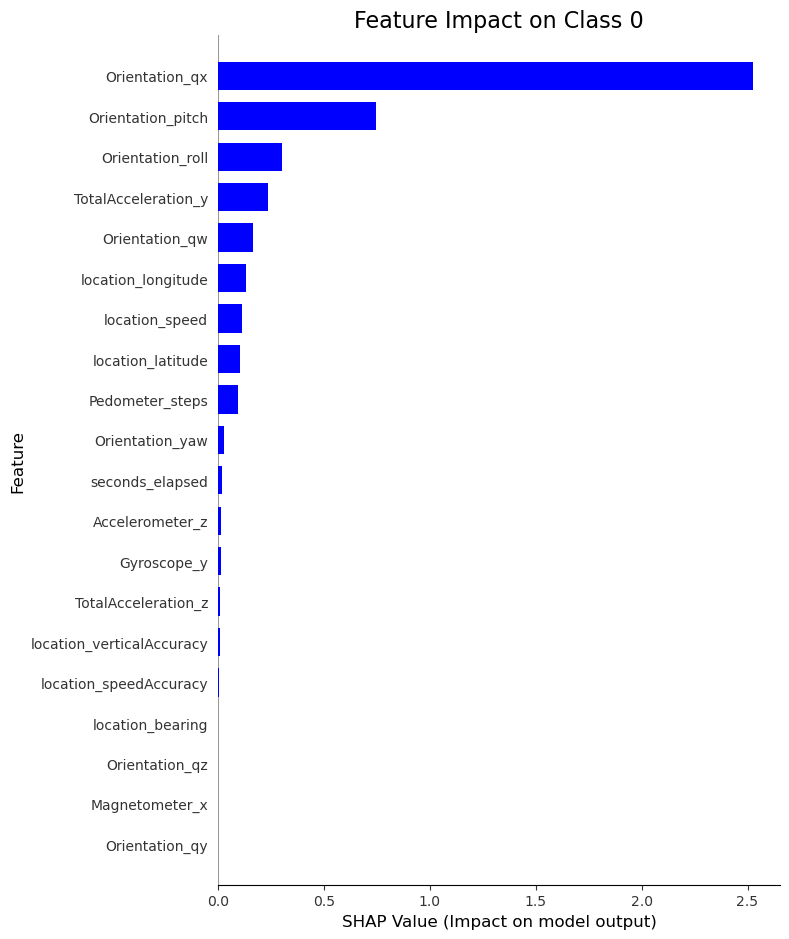

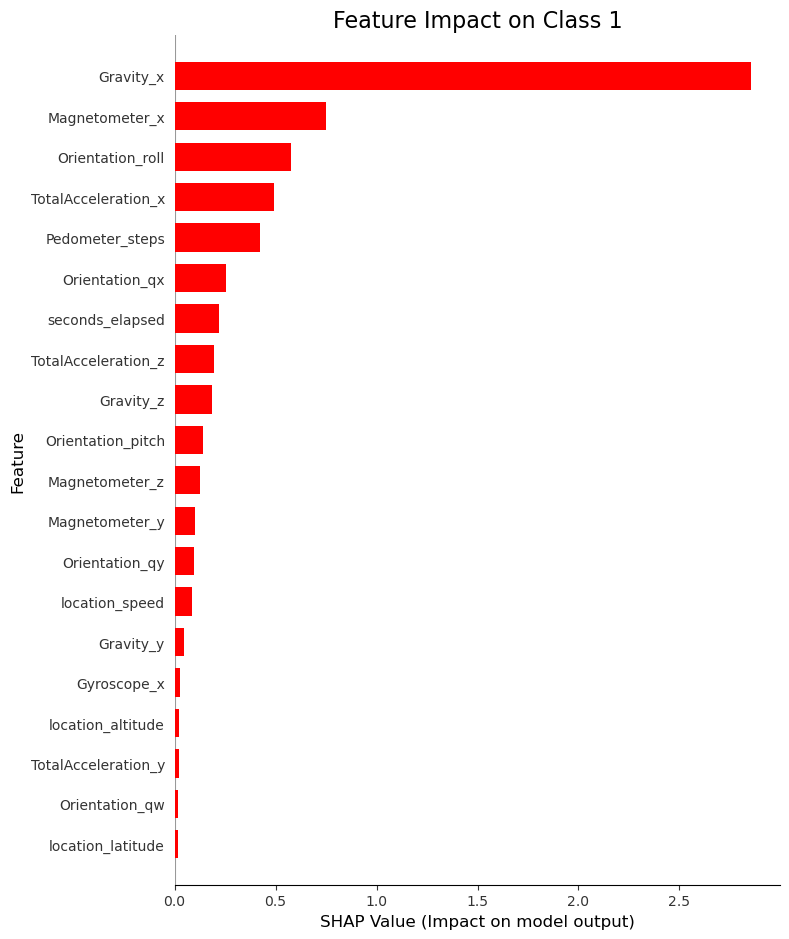

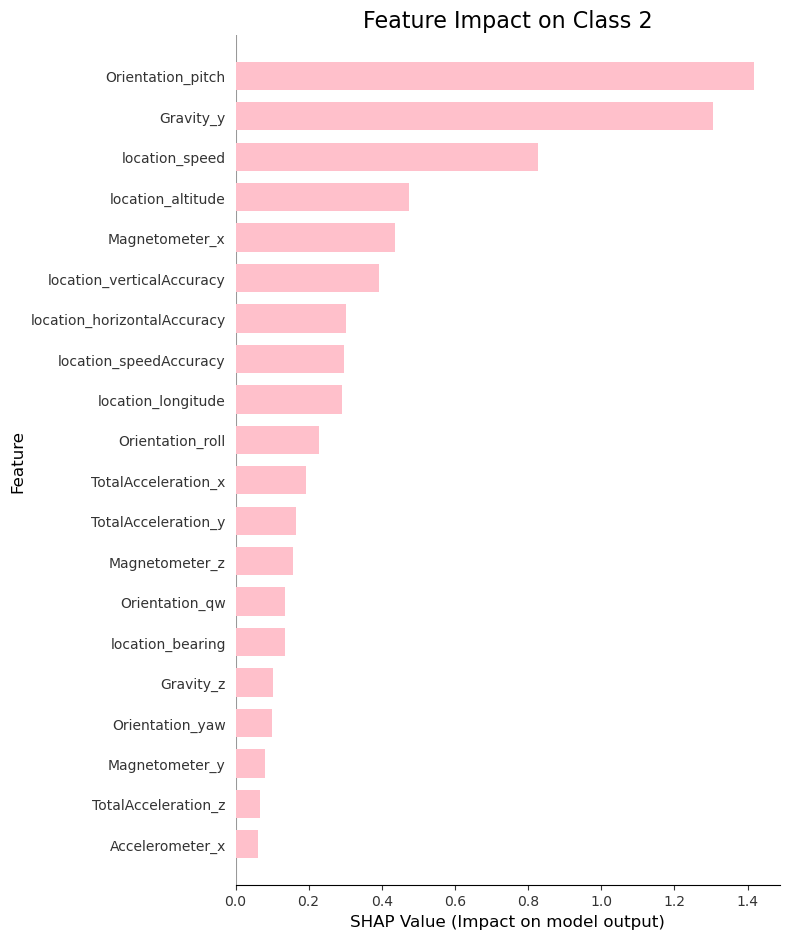

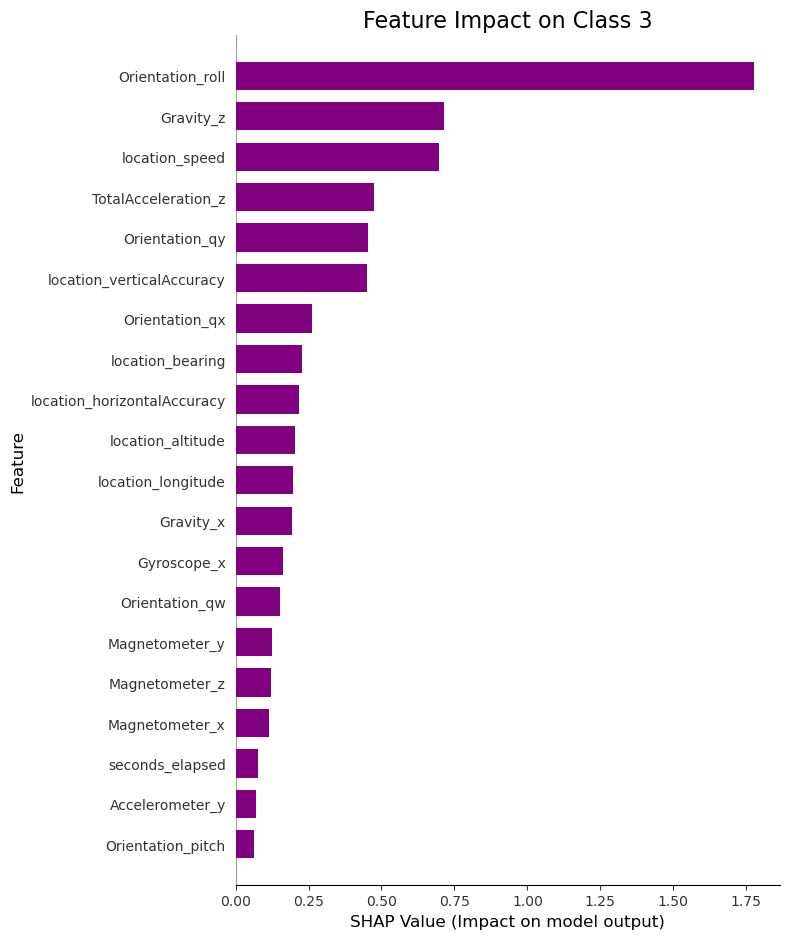

In [6]:


# Zakładam, że masz już shap_values i features_df
colors = ['blue', 'red', 'pink', 'purple', 'green']

for i in range(4):
    fig, ax = plt.subplots()
    shap.summary_plot(shap_values[:,:,i], features_df, plot_type="bar", color=colors[i], show=False)
    plt.title(f'Feature Impact on Class {i}', fontsize=16)
    plt.xlabel('SHAP Value (Impact on model output)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    # Usuwanie napisu na dole
    for text in plt.gca().texts:
        text.set_visible(False)
    # Ustawienia osi i etykiety
    plt.gca().tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()
